<a href="https://colab.research.google.com/github/Sylar257/My-data-science-tool-kit/blob/master/145_PyTorch_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 145 PyTorch Tricks
This is a series of useful PyTorch tricks inspired by **vainaijr** in his [YouTube channel](https://www.youtube.com/watch?v=nnHQT9JnY74&list=PLUY8w37x-QUUkawz-cBnjLpvaZWvPZh_s&index=2&t=29s).<br>
This notebook is an implementation of all these techniques and is designed in a way to best demonstrate their usefulness.

# Trick #1
Visualization model using `torchsummaryX`

In [0]:
import torch
import torchvision.models as models
from Utils import *

Here we will build a Single-shot-detection model with just 20 classes.

In [0]:
# Create SSD300 with pretrained weights in the base-architecture
n_classes = 20
model = SSD300(n_classes)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:05<00:00, 107MB/s]



Loaded base model with pre-trained weights



In [0]:
# install torchsummaryX
!pip install torchsummaryX

In [0]:
from torchsummaryX import summary

`summary(model, input)` takes our intentional model and a pseudo input **with the correct shape**

In [0]:
# pseudo input of batch size = 3, num_channel = 3, pixel: 300x300
summary(model, torch.zeros((3,3,300,300)))

                                         Kernel Shape        Output Shape  \
Layer                                                                       
0_base.Conv2d_conv1_1                   [3, 64, 3, 3]   [3, 64, 300, 300]   
1_base.BatchNorm2d_bn_1_1                        [64]   [3, 64, 300, 300]   
2_base.Conv2d_conv1_2                  [64, 64, 3, 3]   [3, 64, 300, 300]   
3_base.BatchNorm2d_bn_1_2                        [64]   [3, 64, 300, 300]   
4_base.MaxPool2d_pool1                              -   [3, 64, 150, 150]   
5_base.Conv2d_conv2_1                 [64, 128, 3, 3]  [3, 128, 150, 150]   
6_base.BatchNorm2d_bn_2_1                       [128]  [3, 128, 150, 150]   
7_base.Conv2d_conv2_2                [128, 128, 3, 3]  [3, 128, 150, 150]   
8_base.BatchNorm2d_bn_2_2                       [128]  [3, 128, 150, 150]   
9_base.MaxPool2d_pool2                              -    [3, 128, 75, 75]   
10_base.Conv2d_conv3_1               [128, 256, 3, 3]    [3, 256, 75, 75]   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_base.Conv2d_conv1_1,"[3, 64, 3, 3]","[3, 64, 300, 300]",1792.0,1.555200e+08
1_base.BatchNorm2d_bn_1_1,[64],"[3, 64, 300, 300]",128.0,6.400000e+01
2_base.Conv2d_conv1_2,"[64, 64, 3, 3]","[3, 64, 300, 300]",36928.0,3.317760e+09
3_base.BatchNorm2d_bn_1_2,[64],"[3, 64, 300, 300]",128.0,6.400000e+01
4_base.MaxPool2d_pool1,-,"[3, 64, 150, 150]",NaN,NaN
5_base.Conv2d_conv2_1,"[64, 128, 3, 3]","[3, 128, 150, 150]",73856.0,1.658880e+09
6_base.BatchNorm2d_bn_2_1,[128],"[3, 128, 150, 150]",256.0,1.280000e+02
7_base.Conv2d_conv2_2,"[128, 128, 3, 3]","[3, 128, 150, 150]",147584.0,3.317760e+09
8_base.BatchNorm2d_bn_2_2,[128],"[3, 128, 150, 150]",256.0,1.280000e+02


Final Note: Normally, if we use architectures directly from `TorchVision` or `Keras` we would have nice model summary just like this.<br>
This libarary is particular useful when we want to inspect user people's model or a verions that we have modified besed on commonly used models like the example above.<br>
In addition, we have a nice visualization of **num of parameters** & **output demension** for each layer which is kind of nice for debugging your own model or simply for reference.


# Trick #2
PyTorch Hooks

PyTorch hook is a tool that we can *register* to any **tensor** or **nn.Module** during our computation so that we can monitor what is going on with our `forward` and `backward` loops.<bR>
The `forward` is not refered to `nn.Module.forward` bu the `torch.Autograd.Function` object that is the `grad_fn` of a **tensor**.<br>
Notice, that a `nn.Module` like `nn.Linear` can have multiple `forward` invocations. It's output is created by two operations, $Y = W*X+B$, *addition* and *multiplication* and thus there will be two `forward` calls. 

## Hook types
1. The Forward Hook
2. The Backward Hook

A forward hook is excuted during the forward pass, while the backward hook is executed when `backward` function is called both of which are *functions* of `Autograd.Funciton` object.

A hook in PyTorch is basically a function, with a very specific signature. When we say a hook is executed, in reality, we are talkingabout this function being executed.<br>
`grad` is basically the value contained in the `grad` attribute of the tensor **after** `backward` is called. The function is not supposed to modify it's argument. It must either return `None` or a Tensor which will be used in place of `grad` for further gradient computations.<br>
The below example clarifies this point:

In [0]:
import torch
a = torch.ones(10)
a.requires_grad

False

In [0]:
a.requires_grad = True
a.requires_grad

True

In [0]:
b = 2*a
b.requires_grad

True

In [0]:
print(a.is_leaf)
print(b.is_leaf)

True
False


Since `b` is not a **leaf Variable**, its `grad` will by degault be destroyed during computation.<br>
We can used `b.retain_grad()` to ask PyTorch to retain its `grad`

In [0]:
b.retain_grad()

In [0]:
c = b.mean()
print(f"requires_grad: {c.requires_grad}")
print(f"is_lead: {c.is_leaf}")

requires_grad: True
is_lead: False


In [0]:
# pretend c is the loss being computed
c.backward()
print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


Now we redo the experiment but with a **hook** that multiplies `b`'s grad by 2

In [0]:
a = torch.ones(10)
a.requires_grad = True
b = 2*a
b.retain_grad()
b.register_hook(lambda x:print(x))
b.mean().backward() # pretend the mean of b is the loss we want to back-prop

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


Here we can see that, the print out is exactly the same result by using **hook** on `b`, and the `lambda` function automatically take the `b.grad` as input.<br>
This gives us a sense that hook is tracking.

In [0]:
print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


There are several uses of functionality as above:
1. We can print the *value* of gradient for **debugging**. We can also log them. This is especially useful with `non-leaf` variables whose gradients are freed up unless we perform `retain_grad` upon them. Doing the latter can lead to increased memory retention. Hooks provide much cleaner way to aggregate these values.
2. We can modify gradient **during** the backward pass. This is very important. While we can still access the `grad` variable of a tensor in a network, we can only access it after the **entire backward pass** has been processed. For example, we multiplied `b`'s gradient by 2, and now the subsequent gradient calculations, like those of `a`(or any tensor that will depend upon `b` for gradient) used `2*brad(b)` instead of `grad(b)`. In contrast, had we individually updated the parameters **after** the `backward`, we'd have to multily `b.grad` as well as `a.grad`

In [0]:
# to demonstrate
a = torch.ones(10)
a.requires_grad = True
b = 2*a
b.retain_grad()
b.mean().backward()

print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


In [0]:
b.grad *= 2
print(a.grad, b.grad) # Note that in this case, a's grad needs to be updated mannually

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000])


## Hooks for nn.Module objects
For **backward hook**:
`hook(module, grad_input, grad_output)`
___
For **forward hook**:
`hook(module, input, output)`
___

In [0]:
import torch.nn as nn
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2, stride=2) # (8-2+0)/2+1 = 4
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1  = nn.Linear(160,5)

    def forward(self, x):
        x = self.relu(self.conv(x))
        return self.fc1(self.flatten(x))

In [0]:
Net = myNet()
summary(Net,torch.zeros(1,3,8,8))

         Kernel Shape   Output Shape Params Mult-Adds
Layer                                                
0_conv  [3, 10, 2, 2]  [1, 10, 4, 4]  130.0     1.92k
1_relu              -  [1, 10, 4, 4]      -         -
2_fc1        [160, 5]            [5]  805.0     800.0
-------------------------------------------------------
                      Totals
Total params           935.0
Trainable params       935.0
Non-trainable params     0.0
Mult-Adds              2.72k


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_conv,"[3, 10, 2, 2]","[1, 10, 4, 4]",130.0,1920.0
1_relu,-,"[1, 10, 4, 4]",NaN,NaN
2_fc1,"[160, 5]",[5],805.0,800.0


In [0]:
def hook_fn(m,i,o):
    print(m)
    print("---------Input Grad----------")

    for grad in i:
        try:
            print(grad.shape)
        except AttributeError:
            print("None found for input Gradient")
    
    print("--------Output Grad----------")
    for grad in o:
        try:
            print(grad.shape)
        except AttributeError:
            print("None found for output Gradient")
    print("\n")

In [0]:
Net.named_modules

<bound method Module.named_modules of myNet(
  (conv): Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2))
  (relu): ReLU()
  (fc1): Linear(in_features=160, out_features=5, bias=True)
)>

In [0]:
Net.conv.register_backward_hook(hook_fn)

In [0]:
Net.fc1.register_backward_hook(hook_fn)

In [0]:
inp = torch.rand(1,3,8,8)
out = Net(inp)
out

tensor([ 0.1495, -0.0683,  0.1981,  0.0851, -0.0905], grad_fn=<AddBackward0>)

In [0]:
# pretend we have the following as loss
(1-out.mean()).backward()

Linear(in_features=160, out_features=5, bias=True)
---------Input Grad----------
torch.Size([5])
torch.Size([5])
--------Output Grad----------
torch.Size([5])


Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2))
---------Input Grad----------
None found for input Gradient
torch.Size([10, 3, 2, 2])
torch.Size([10])
--------Output Grad----------
torch.Size([1, 10, 4, 4])




Note that, the `Linear layer` gets called first because the backward pass actually go through it first and then backprop to the `conv layer`

## Proper way of implementing Hooks(in **back-prop**)er way of implementing Hooks(in **back-prop**)

We have:
1.  torch.autograd.Variable.register_hook (Python method, in Automatic differentiation package)
2.  torch.nn.Module.register_backward_hook (Python method, in torch.nn)
3.  torch.nn.Module.register_forward_hook

The first `register_hook`，is for any **Variable**. It's essentially a **callback** function that is going to be executed every time when `Autograd` gradient is computed.<br>
While `Module.register_backward_hook` & `n.Module.register_forward_hook` are for `nn.Module` object and their `hook_fn` shoud take torch:
<br>`def hook_fn(m, i, o):` where `i` refers to input and `o` refers to output

### An example
Using `named_parameters` function we can accomplish `gradient modifying/clipping`. <br>
The following example does two things:
1. Turn gradients of linear biases into zero while back-prop (no updates for biase)
2. Make sure that for no gradient going to `conv layer` is less than 0 (all positive)

In [0]:
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2,stride=2)
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1  = nn.Linear(160,5)
    def forward(self,x):
        x = self.relu(self.conv(x))
        x.register_hook(lambda grad: torch.clamp(grad, min=0)) # minimun back-prop gradient of value 0

        # print whether there is any negative grad
        x.register_hook(lambda grad: print("Gradients less than zero:", bool((grad<0).any())))
        
        return self.fc1(self.flatten(x))

In [0]:
net = myNet()

In [0]:
for name, param in net.named_parameters():
    print(name)

conv.weight
conv.bias
fc1.weight
fc1.bias


In [0]:
for name, param in net.named_parameters():
    if 'fc' in name and 'bias' in name:
        print(name, param, sep='\n')

fc1.bias
Parameter containing:
tensor([-0.0190, -0.0193, -0.0728,  0.0082,  0.0160], requires_grad=True)


In [0]:
for name, param in net.named_parameters():
    if 'fc' in name and 'bias' in name:
        # assign zero to bias grad with identical dimensions
        param.register_hook(lambda grad: torch.zeros_like(grad))

In [0]:
out = net(torch.randn(1,3,8,8))

In [0]:
(1-out).mean().backward()

Gradients less than zero: False


In [0]:
print(f'the bias for linear layer is: {net.fc1.bias.grad}')

the bias for linear layer is: tensor([0., 0., 0., 0., 0.])


# Trick #3
`pack_padded_sequence` & `pad_packed_sequence`
often used together dynamic RNNs

In [0]:
import torch
from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [0]:
# Create a tensor with variable length sequences and pads (25)
seqs = torch.LongTensor([[0, 1, 2, 3, 25, 25, 25],
                         [4, 5, 25, 25, 25, 25, 25],
                         [6, 7, 8, 9, 10, 11, 25]])


In [0]:
# Store lengths of the actual sequences, ignoring padding(25)
# These are the points up to which we want the RNN to process the sequence
seq_lens = torch.LongTensor([4,3,6]) # number of non-trivial elements in each row

In [0]:
seq_lens, sort_ind = seq_lens.sort(dim=0, descending=True)
seq_lens, sort_ind

(tensor([6, 4, 3]), tensor([2, 0, 1]))

In [0]:
seqs = seqs[sort_ind]
seqs

tensor([[ 6,  7,  8,  9, 10, 11, 25],
        [ 0,  1,  2,  3, 25, 25, 25],
        [ 4,  5, 25, 25, 25, 25, 25]])

In [0]:
# Create an embedding layer, with 0 vectors for the pads
embeds = nn.Embedding(num_embeddings=26,
                      embedding_dim=10,
                      padding_idx=25)

In [0]:
lstm = nn.LSTM(10, 50, bidirectional=False, batch_first=True)

In [0]:
# WITHOUT dynamic batching
embeddings = embeds(seqs)
print(embeddings.size())
out_static, _ = lstm(embeddings)
out_static.size()

torch.Size([3, 7, 10])


torch.Size([3, 7, 50])

In [0]:
# The number of timesteps in the output will be the same as the total padded timesteps in the input,
# since the LSTM computed over the pads
assert out_static.size(1) == embeddings.size(1)

In [0]:
# Look at the output at a timestep that we know is a pad
print(out_static[1,-1])

tensor([ 0.0821, -0.0592, -0.0492,  0.0023, -0.0777, -0.0576, -0.0531,  0.1315,
         0.0021,  0.0473,  0.0195,  0.0764, -0.1129, -0.0334,  0.0724,  0.1498,
        -0.0529, -0.0625, -0.0379,  0.0425,  0.0015,  0.1318,  0.0448, -0.0354,
         0.1645, -0.0835,  0.0134,  0.0614,  0.0697,  0.0223,  0.0131,  0.0646,
        -0.0725, -0.0345,  0.0158, -0.1179,  0.0900,  0.0378, -0.1458,  0.0356,
         0.0207, -0.0591, -0.0921, -0.0226,  0.0078,  0.0157,  0.0773,  0.0889,
        -0.0189,  0.0382], grad_fn=<SelectBackward>)


Now let's try the same process with **Dynamic Batching**

In [0]:
# Pack the sequence
packed_seqs = pack_padded_sequence(embeddings, seq_lens.tolist(), batch_first=True)
print(f'the values in the seq_lens: {seq_lens.tolist()}, with the effective sum of {sum(seq_lens.tolist())}')
embeddings.shape,packed_seqs.data.size()

the values in the seq_lens: [6, 4, 3], with the effective sum of 13


(torch.Size([3, 7, 10]), torch.Size([13, 10]))

In [0]:
out_dynamic, _ = lstm(packed_seqs)
out_dynamic.data.size()

torch.Size([13, 50])

In [0]:
out_dynamic, lens = pad_packed_sequence(out_dynamic, batch_first=True)
out_dynamic.size(), lens

(torch.Size([3, 6, 50]), tensor([6, 4, 3]))

Note that here, `out_dynamic` is padded in shape of `[3,6,50]` instead of `[3,7,50]` because we know we can discard one pad from all rows to make it even more compact. <br>
In short, `6` is the longest sequence length in all batches.

In [0]:
assert out_dynamic.size(1) != embeddings.size(1)
print(out_dynamic.shape)

torch.Size([3, 6, 50])


In [0]:
# Look at the output at a timestep that we know is a pad
print(out_dynamic[1, -1])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.], grad_fn=<SelectBackward>)


Final note:<br>
* `pack_padded_sequence` removes pads, flattens by timestep, and keeps track of **effective batch_size** at each timestep
* The RNN computes only on the effective batch size "b_t" at each timestep while save computation from computing *pads*
* This is why we sort, so that top "b_t" rows at timestep "t" are aligned with the top "b_t"" outputs from timestep "t-1"


# Trick #4
Torchviz to visualize PyTorch execution graphs and traces

In [0]:
!pip install torchviz

     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=0affc6da8f5f01332395a52be0b79c445c33958b783e4ccfcd50fedb29b878bc
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


### Let's start with a basic example(base MLP model)

In [0]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

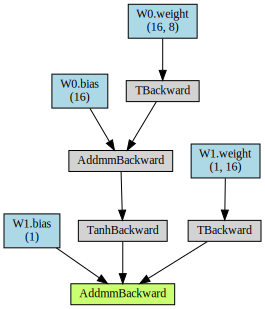

In [0]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8,16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16,1))

inp = torch.randn(1,8)

make_dot(model(inp), params = dict(model.named_parameters()))

The method is built for directed graphs of PyTorch operations, built during **forward** propagation and showing which operations will be called on **backward**. <br>
It omits subgraphs which do not require gradients.

### Visualiza AlexNet

In [0]:
from torchvision.models import AlexNet

model = AlexNet()


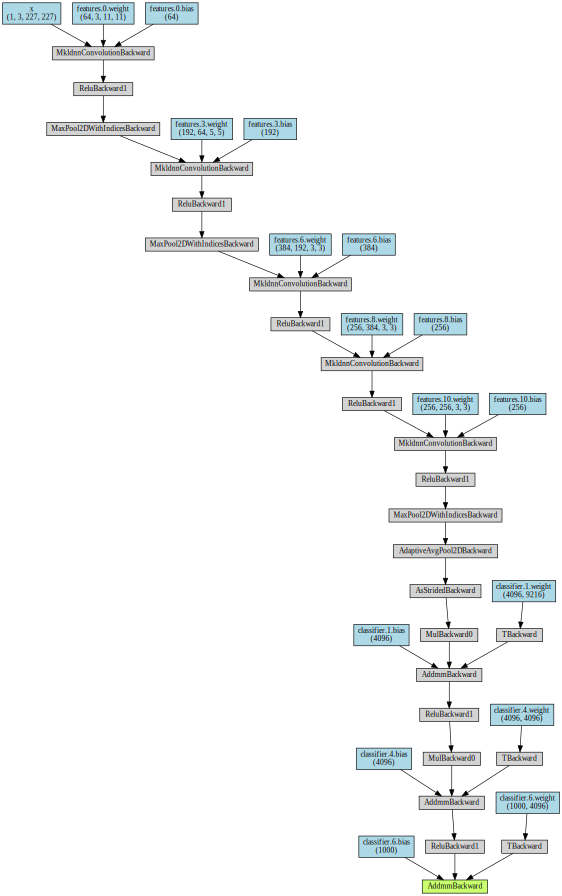

In [0]:
x = torch.randn(1,3,227,227).requires_grad_(True)
y = model(x)
make_dot(y, params = dict(list(model.named_parameters()) + [('x',x)]))

In [0]:
import torch
import torchvision.models as models
from Utils import *

# Create SSD300 with pretrained weights in the base-architecture
n_classes = 20
model = SSD300(n_classes)


Loaded base model with pre-trained weights



In [0]:
x = torch.randn(1,3,300,300)
y = model(x)
dot = make_dot(y, params = dict(list(model.named_parameters())))

In [0]:
dot.render('VGG300_BN.gv', view=True)  

'VGG300_BN.gv.pdf'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Trick #5
[Awesome PyTorch list](https://github.com/bharathgs/Awesome-pytorch-list)


This is a truly awesome repo full of practical tutorials that implements various state-of-the-art deep learning techniques using PyTorch including:
1. NLP & Speech Processing
2. Computer Vision
3. Probabilistic/Generative Libraries
4. Other libraries
5. Paper implementations<br>

Basically a good place to look into when starting a new project to check for relevant realization techniques.<br>
Since deep learning is such a fast developing fielding, if it weren't for the reason that this repo stoped getting updated 2 years ago, it should be #1 on this list.

# Trick #6
**AdaBound optimizer**<br>
Finally, AdaBound is available in PyTorch. One of the most powerful optimizer that out performs Adam in some cases with super fast convergence rate. Definely, something you would want to try out when fast prototyping.<br>
The method is based on [Adaptive Gradient Methods with Dynamic Bound of Learning Rate](https://openreview.net/forum?id=Bkg3g2R9FX).In Proc. of ICLR 2019.

In [0]:
## implementation
optimizer = adabound.AdaBound(model.parameters(), lr=1e-3, final_lr=0.1)

As described in the paper, AdaBound is an optimizer that behavces like **Adam** at the beginning of the training, and gradually transforms to SGD at the end.  In this way, it can **combines the benefits of adaptive methods, viz. fast initial process, and the good final generalization properties of SGD.** <br>
The `final_lr` parameter indicates **Adabound** would transforms to an SGD with this learninig rate. In common cases, a default final learning rate of `0.1` can achieve relatively good and statble results on *unseen data*.<br>
This method is not very sensitive to it's hyperparameters. *See Appendix G of the paper for more details*

# Trick #7
Flatten layer in PyTorch

In [0]:
import torch.nn as nn
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()
    
    def forward(self, x):
        return x.view(x.size(0), -1)

# Trick #8
Expand_as in PyTorch for broadcasting

In [0]:
import torch
import torch.nn as nn

In [0]:
a = torch.tensor([1,2,3])
b = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

In [0]:
c = a.expand_as(b)
c

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [0]:
d = a+b
d # here a will be broadcasted before compute addition with b

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

# Trick #9
**FastAI** listify

In [0]:
x = [1,2,3]
y = torch.arange(12)

In [0]:
x

[1, 2, 3]

In [0]:
y

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
from fastai.train import listify
z = listify(x)
z

[1, 2, 3]

In [0]:
z = listify(1,x)
z

[1, 1, 1]

In [0]:
a = listify(1,y)
a

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
b = listify('good',x)
b

['good', 'good', 'good']

# Trick #10
In_place

In [0]:
# an example of NOT in-place
a = torch.randn(1)
b = torch.randn(1)
id(a)

139797812240960

In [0]:
id(b)

139797812224360

In [0]:
# an example of in-place
c = torch.randn(1)
d = torch.randn(1)
id(c)

139797812367792

In [0]:
id(d)

139797812492616

In [0]:
c += d
id(c)   # not changed because in-place

139797812367792

In [0]:
# another example of in-place
e = torch.randn(1)
f = torch.randn(1)
id(e)

139797812423848

In [0]:
id(f)

139797812422336

In [0]:
e.add_(f)
id(e)       # this case, in-place

139797812423848

In PyTroch _ as postfix means inplace.<br>
The variable will be modified and stored in the same memory place without creating a no vacancy for storage


# Trick #11
`AdaptiveConcatPool2d`

In [0]:
import torch.nn as nn
# nn.AdaptiveAvgPool2d??

In [0]:
class AdaptiveConcatPool2d(nn.Module):
    def __init__(self, sz=1):
        super().__init__()
        self.dropout_size = sz
        self.ap = nn.AdaptiveAvgPool2d(sz)
        self.mp = nn.AdaptiveMaxPool2d(sz)
    def forward(self, x):
        return torch.cat([self.ap(x), self.mp(x)],dim=1)

In [0]:
x = torch.tensor([
                  [
                   [1.,2.,3.],
                   [1.,2.,3.],
                   [1.,2.,4.]
                  ],
                  [
                   [1.,2.,3.],
                   [1.,2.,3.],
                   [1.,2.,5.]
                  ],
                  [
                   [1.,2.,3.],
                   [1.,2.,3.],
                   [1.,2.,3.]
                  ]
])
x.shape

torch.Size([3, 3, 3])

In [0]:
A = nn.AdaptiveAvgPool2d(1) # specify the output size
print(A(x).shape)
A(x)

torch.Size([3, 1, 1])


tensor([[[2.3333]],

        [[2.2222]],

        [[2.0000]]])

In [0]:
M = nn.AdaptiveMaxPool2d(1)
M(x)

tensor([[[4.]],

        [[5.]],

        [[3.]]])

In [0]:
A = nn.AdaptiveAvgPool2d((1,3))
print(A(x).shape)
A(x)

torch.Size([3, 1, 3])


tensor([[[1.0000, 2.0000, 3.3333]],

        [[1.0000, 2.0000, 3.6667]],

        [[1.0000, 2.0000, 3.0000]]])

In [0]:
C = AdaptiveConcatPool2d(1)
C(x)

tensor([[[2.1111],
         [4.0000]],

        [[2.2222],
         [5.0000]],

        [[2.0000],
         [3.0000]]])

# Trick #12
logsumexp

In [0]:
a = torch.zeros(1,3)
a

tensor([[0., 0., 0.]])

In [0]:
b = torch.logsumexp(input=a,dim=1,keepdim=False)
b

tensor([1.0986])

In [0]:
zero = torch.tensor([0],dtype=torch.float)
torch.log(torch.exp(zero)+torch.exp(zero)+torch.exp(zero))

tensor([1.0986])

In [0]:
c = torch.ones(1,3)
c

tensor([[1., 1., 1.]])

In [0]:
d = torch.logsumexp(c,dim=1)
d

tensor([2.0986])

In [0]:
one = torch.tensor([1], dtype=torch.float)
torch.log(torch.exp(one)+torch.exp(one)+torch.exp(one))

tensor([2.0986])

# Trick 13
Named_children

In [0]:
import torch
import torch.nn as nn

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d( 1, 10, 3)
        self.conv2 = nn.Conv2d(10, 20, 3)
        self.conv2_dropout = nn.Dropout2d(p=0.5)
        self.fc1   = nn.Linear(320, 50)
        self.fc2   = nn.Linear(50, 10)
    
    def forward(self, x):
        pass

In [0]:
x = Net()

In [0]:
for l, name in x.named_children():
    print(f"layer {l} is: {name}")

layer conv1 is: Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
layer conv2 is: Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
layer conv2_dropout is: Dropout2d(p=0.5, inplace=False)
layer fc1 is: Linear(in_features=320, out_features=50, bias=True)
layer fc2 is: Linear(in_features=50, out_features=10, bias=True)


# Trick #14
`torch.addcmul()`

In [0]:
x = torch.ones(1,3)
y = torch.ones(3,1)
z = torch.ones(1,1)*2
x, y, z

(tensor([[1., 1., 1.]]), tensor([[1.],
         [1.],
         [1.]]), tensor([[2.]]))

In [0]:
# torch.addcmul(input, value=1, tensor1, tensor2)
a = torch.addcmul(z, 0.5, x, y) # z + 0.5*x*y
a

tensor([[2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000]])

In [0]:
x,y

(tensor([[1., 1., 1.]]), tensor([[1.],
         [1.],
         [1.]]))

In [0]:
x*y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
z + 0.5*x*y

tensor([[2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000]])

# Trick #15
`torch.permute` used to re-arrange the dimension of a given tensor

In [0]:
x = torch.randn(3,4)
x

tensor([[ 0.2616,  0.5046, -0.1475,  0.4465],
        [-0.1938,  0.4212, -0.4747,  0.7031],
        [ 1.9922,  2.0265, -0.9237, -1.6005]])

In [0]:
y = x.permute(1,0)
y

tensor([[ 0.2616, -0.1938,  1.9922],
        [ 0.5046,  0.4212,  2.0265],
        [-0.1475, -0.4747, -0.9237],
        [ 0.4465,  0.7031, -1.6005]])

In [0]:
a = torch.randn(3,4,5,6,7,8)
a.shape

torch.Size([3, 4, 5, 6, 7, 8])

In [0]:
b = a.permute(2,1,0,4,3,5)
b.size()

torch.Size([5, 4, 3, 7, 6, 8])

# Trick #16
Creating a concise four layer CNN

In [0]:
def conv_block(in_channels, out_channels):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, 2),
                         nn.BatchNorm2d(out_channels),
                         nn.ReLU(),
                         nn.MaxPool2d(kernel_size=2))

In [0]:
class ConvNet(nn.Module):
    def __init__(self, x_dim=3, hid_dim=64, z_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
            conv_block(x_dim,   hid_dim),
            conv_block(hid_dim, hid_dim),
            conv_block(hid_dim, hid_dim),
            conv_block(hid_dim, z_dim)
        )
    def forward(self, x):
        x = self.encoder(x)
        x = nn.MaxPool2d(5)(x)
        x = x.view(x.size(0), -1)  # flatten while only retain the batch_size dimenison
        return x

In [0]:
net = ConvNet()
net

ConvNet(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05

# Trick #17
The mechanism behind `torch.dropout()`

In [0]:
y = torch.ones(3,3)
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
D = nn.Dropout(0)
D(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
D = nn.Dropout(0.5)
D(y)

tensor([[0., 2., 0.],
        [2., 2., 0.],
        [0., 2., 0.]])

In [0]:
D = nn.Dropout(1)
D(y)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [0]:
D = nn.Dropout(0.3)
D(y)

tensor([[0.0000, 0.0000, 0.0000],
        [1.4286, 0.0000, 1.4286],
        [1.4286, 1.4286, 1.4286]])

In [0]:
D = nn.Dropout(0.8)
D(y)

tensor([[0., 0., 5.],
        [5., 0., 5.],
        [5., 0., 0.]])

Final note, the output value will be `original/(1-p)`

# Trick #18
Creating mini-batch

In [0]:
import torch
x = torch.randn(3,128,128)
x.shape

torch.Size([3, 128, 128])

In [0]:
t = x.unsqueeze(0)
t.shape

torch.Size([1, 3, 128, 128])

In [0]:
u = x[None,:]
u.shape

torch.Size([1, 3, 128, 128])

In [0]:
v = x[None]
v.shape

torch.Size([1, 3, 128, 128])

# Trick #19
Look into `torch.nn.ReLU()`

In [0]:
x = torch.randn(3,3)
x

tensor([[-1.1243,  0.5653,  0.3340],
        [-1.7015, -0.8263,  0.2759],
        [ 0.5675,  0.8615, -0.4378]])

In [0]:
y = nn.ReLU()
print(y(x)) # All negative values goes to zero, inplance default is False
x

tensor([[0.0000, 0.5653, 0.3340],
        [0.0000, 0.0000, 0.2759],
        [0.5675, 0.8615, 0.0000]])


tensor([[-1.1243,  0.5653,  0.3340],
        [-1.7015, -0.8263,  0.2759],
        [ 0.5675,  0.8615, -0.4378]])

In [0]:
y = nn.ReLU(inplace=True)
print(y(x))
x

tensor([[0.0000, 0.5653, 0.3340],
        [0.0000, 0.0000, 0.2759],
        [0.5675, 0.8615, 0.0000]])


tensor([[0.0000, 0.5653, 0.3340],
        [0.0000, 0.0000, 0.2759],
        [0.5675, 0.8615, 0.0000]])

# Trick #20
change torch.tensor **type**

In [0]:
x = torch.randn(3,3)
x.dtype

torch.float32

In [0]:
x = x.type(torch.long)
x.dtype

torch.int64

In [0]:
x = torch.randn(3,3).type(torch.float)
x.dtype

torch.float32

In [0]:
x = torch.ones(3,3, dtype=torch.long)
x.dtype

torch.int64

# Trick #21
`L1Loss` vs `MSELoss`

In [0]:
x = torch.randn(1)
x

tensor([-0.8117])

In [0]:
y = torch.ones(1)
y

tensor([1.])

In [0]:
z = nn.L1Loss()
z(x,y)

tensor(1.8117)

In [0]:
abs(x-y)

tensor([1.8117])

In [0]:
a = nn.MSELoss()
a(x,y)

tensor(3.2822)

In [0]:
pow((x-y),2)

tensor([3.2822])

# Trick #22
Sigmoid in PyTorch

In [0]:
x = torch.randn(1)
x

tensor([-1.1949])

In [0]:
y = nn.Sigmoid()
y(x)

tensor([0.2324])

In [0]:
import math
(1/(1+math.exp(-x)))

0.23237839781597944

In [0]:
z = torch.ones(3,4)
z

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [0]:
y(z)

tensor([[0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311]])

In [0]:
z = torch.randn(3,4)
z

tensor([[ 0.0480,  0.2540,  1.5722,  0.3227],
        [-1.0730,  0.8581, -1.3591, -0.2922],
        [ 0.6118,  0.5229,  0.0910,  1.1228]])

In [0]:
y(z)

tensor([[0.5120, 0.5632, 0.8281, 0.5800],
        [0.2548, 0.7023, 0.2044, 0.4275],
        [0.6484, 0.6278, 0.5227, 0.7545]])

# Trick #23
Softmax in Pytorch


In [0]:
x = torch.randn(2,2)
x

tensor([[-1.0719, -0.8291],
        [-0.3748,  0.0375]])

In [0]:
y = nn.Softmax()
a = y(x);a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[0.4396, 0.5604],
        [0.3983, 0.6017]])

In [0]:
a[0][0]+a[0][1]

tensor(1.)

In [0]:
a[1][0]+a[1][1]

tensor(1.)

# Trick #24
`nn.ModuleList`

In [0]:
x = nn.ModuleList([nn.Dropout(0.5),
                   nn.ReLU()])

In [0]:
x

ModuleList(
  (0): Dropout(p=0.5, inplace=False)
  (1): ReLU()
)

In [0]:
y = torch.randn(3,3)
y

tensor([[ 0.6233, -0.3660,  0.8597],
        [-1.4992, -0.3499,  1.3273],
        [ 0.5832, -1.0665, -1.6803]])

In [0]:
t = x[0](y);t  # performed dropout, and value modified as original/(1-0.5)

tensor([[ 0.0000, -0.7321,  1.7194],
        [-2.9985, -0.6999,  2.6546],
        [ 0.0000, -2.1329, -0.0000]])

In [0]:
r = x[1](t);r   # performed ReLU

tensor([[0.0000, 0.0000, 1.7194],
        [0.0000, 0.0000, 2.6546],
        [0.0000, 0.0000, 0.0000]])

# Trick #25
`nn.Linear`

In [0]:
x = torch.randn(2);x

tensor([0.0459, 0.0121])

In [0]:
a = nn.Linear(2,1);a

Linear(in_features=2, out_features=1, bias=True)

In [0]:
a.weight, a.bias

(Parameter containing:
 tensor([[0.1052, 0.3337]], requires_grad=True), Parameter containing:
 tensor([-0.3842], requires_grad=True))

In [0]:
a(x)

tensor([-0.3754], grad_fn=<AddBackward0>)

In [0]:
x@a.weight.t()+a.bias

tensor([-0.3754], grad_fn=<AddBackward0>)

# Trick #26
`torch.mean()`

In [0]:
x = torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
x.shape

torch.Size([2, 4])

In [0]:
y = x.mean()
y

tensor(4.5000)

In [0]:
y = x.mean(dim=1, keepdim=True);y

tensor([[2.5000],
        [6.5000]])

In [0]:
y = x.mean(dim=1, keepdim=False);y

tensor([2.5000, 6.5000])

In [0]:
y.shape

torch.Size([2])

In [0]:
x = torch.randn(3,4,5)
x.shape

torch.Size([3, 4, 5])

In [0]:
y = x.mean(dim=1, keepdim=False);y.shape

torch.Size([3, 5])

In [0]:
y = x.mean(dim=1, keepdim=True);y.shape

torch.Size([3, 1, 5])

In [0]:
y

tensor([[[ 0.1030, -0.2823, -0.3783, -0.4649, -0.4580]],

        [[-0.0760, -0.3777, -0.3589,  0.6745,  0.0425]],

        [[ 0.5953, -0.7010, -0.4688,  0.1781, -0.3393]]])

# Trick #27
Use  `dropblock` in PyTorch

In [0]:
!pip install dropblock

In [0]:
x = torch.ones(5,5,5,5);x.shape

torch.Size([5, 5, 5, 5])

In [0]:
import dropblock
y = dropblock.DropBlock2D(drop_prob=0.5, block_size=2)
y(x)    # dropout 2x2 size blocks with chance of 50%

tensor([[[[1.4706, 0.0000, 0.0000, 1.4706, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [1.4706, 0.0000, 0.0000, 1.4706, 1.4706],
          [1.4706, 1.4706, 1.4706, 0.0000, 0.0000]],

         [[1.4706, 0.0000, 0.0000, 1.4706, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [1.4706, 0.0000, 0.0000, 1.4706, 1.4706],
          [1.4706, 1.4706, 1.4706, 0.0000, 0.0000]],

         [[1.4706, 0.0000, 0.0000, 1.4706, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [1.4706, 0.0000, 0.0000, 1.4706, 1.4706],
          [1.4706, 1.4706, 1.4706, 0.0000, 0.0000]],

         [[1.4706, 0.0000, 0.0000, 1.4706, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [1.4706, 0.0000, 0.0000, 1.4706, 1.4706],
      

In [0]:
y = dropblock.DropBlock2D(drop_prob=0.5, block_size=3)
y(x)    # dropout 3x3 size blocks with chance of 50%

tensor([[[[1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887]],

         [[1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887]],

         [[1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887]],

         [[1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
          [1.2887, 1.2887, 1.2887, 1.2887, 1.2887],
      

# Trick #28
Orthogonal Initialization in PyTorch

In [0]:
import torch
import torch.nn as nn
x, y, z = [torch.zeros(3, 3)]*3
x, y, z


(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]), tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]), tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]))

In [0]:
a = nn.init.orthogonal_(x, gain=1) # orthogonal means A@A.t() = I
a

tensor([[ 0.6239,  0.4647, -0.6283],
        [-0.7781,  0.2945, -0.5549],
        [-0.0729,  0.8350,  0.5453]])

In [0]:
a@a.t()

tensor([[1.0000e+00, 1.1334e-07, 1.4851e-07],
        [1.1334e-07, 1.0000e+00, 7.9556e-08],
        [1.4851e-07, 7.9556e-08, 1.0000e+00]])

In [0]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [0]:
b = nn.init.orthogonal_(y, gain=5) # gain adjusted
b

tensor([[-0.8261, -0.1627, -4.9286],
        [ 4.9304,  0.0674, -0.8286],
        [ 0.0934, -4.9969,  0.1493]])

In [0]:
b@b.t()

tensor([[ 2.5000e+01,  2.8265e-07, -1.1301e-06],
        [ 2.8265e-07,  2.5000e+01, -2.2266e-07],
        [-1.1301e-06, -2.2266e-07,  2.5000e+01]])

In [0]:
25*torch.eye(3)

tensor([[25.,  0.,  0.],
        [ 0., 25.,  0.],
        [ 0.,  0., 25.]])

Final note: remember the initialization process is random. We get different matrix by re-running the cell

# Trick #29
Param_groups in `nn.Modules`

In [0]:
import torch
import torch.nn as nn
from torch import optim

In [0]:
l = nn.Linear(3,3)
r = optim.SGD(l.parameters(),lr=0.01)

In [3]:
r

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [5]:
r.param_groups

[{'dampening': 0,
  'lr': 0.01,
  'momentum': 0,
  'nesterov': False,
  'params': [Parameter containing:
   tensor([[-0.0972,  0.1965,  0.2558],
           [-0.1338, -0.2729,  0.3077],
           [ 0.0461,  0.3657, -0.1356]], requires_grad=True),
   Parameter containing:
   tensor([0.2679, 0.1912, 0.1528], requires_grad=True)],
  'weight_decay': 0}]

In [6]:
r.param_groups[0]['params']

[Parameter containing:
 tensor([[-0.0972,  0.1965,  0.2558],
         [-0.1338, -0.2729,  0.3077],
         [ 0.0461,  0.3657, -0.1356]], requires_grad=True),
 Parameter containing:
 tensor([0.2679, 0.1912, 0.1528], requires_grad=True)]

In [8]:
# The first is the weight, the second is the bias
for count, i in enumerate(l.parameters()):
    print(count)
    print(i)

0
Parameter containing:
tensor([[-0.0972,  0.1965,  0.2558],
        [-0.1338, -0.2729,  0.3077],
        [ 0.0461,  0.3657, -0.1356]], requires_grad=True)
1
Parameter containing:
tensor([0.2679, 0.1912, 0.1528], requires_grad=True)


All of these info can be accessed by the **optimizor**'s `param_groups`

# Trick #30
Math behind "standard_deviation"

# Trick #30

# Trick #30

# Trick #30

# Trick #30

# Trick #30